### Importing Libraries

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import yfinance as yf

import os
import math
import datetime as dt

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from utils import load_data, prepare_training_data

from itertools import cycle
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Importing Dataset

In [35]:
crypto_currency = 'BTC'
against_currency = 'USD'

start = dt.datetime(2015,1,1)
end = dt.datetime.now()

In [36]:
df = yf.download(f'{crypto_currency}-{against_currency}', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [37]:
print("Total number of days in dataset :",df.shape[0])
print("Total number of fields in dataset :",df.shape[1])

Total number of days in dataset : 3575
Total number of fields in dataset : 6


In [38]:
df.shape

(3575, 6)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3575 entries, 2015-01-01 to 2024-10-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3575 non-null   float64
 1   High       3575 non-null   float64
 2   Low        3575 non-null   float64
 3   Close      3575 non-null   float64
 4   Adj Close  3575 non-null   float64
 5   Volume     3575 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 195.5 KB


In [40]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3575.000000,3575.000000,3575.000000,3575.000000,3575.000000,3.575000e+03
mean,18662.061581,19083.535346,18214.341707,18679.034080,18679.034080,1.822289e+10
std,19971.275440,20412.251654,19492.887427,19982.239104,19982.239104,1.918243e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,7.860650e+06
25%,2441.319946,2535.934937,2327.180054,2454.109985,2454.109985,1.022930e+09
50%,9426.110352,9595.581055,9255.035156,9428.333008,9428.333008,1.480883e+10
75%,30038.798828,30502.541016,29500.796875,30085.392578,30085.392578,2.919926e+10
max,73079.375000,73750.070312,71334.093750,73083.500000,73083.500000,3.509679e+11


In [41]:
df.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550
2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400
2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100
2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800


In [42]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-10-10,60581.929688,61236.722656,58895.207031,60274.500000,60274.500000,30452813570
2024-10-11,60275.460938,63400.871094,60046.125000,62445.089844,62445.089844,30327141594
2024-10-12,62444.617188,63448.785156,62443.269531,63193.023438,63193.023438,16744110886
2024-10-13,63192.945312,63272.652344,62035.636719,62851.375000,62851.375000,18177529690
2024-10-14,62843.585938,65174.839844,62470.195312,65174.839844,65174.839844,32324804608


### Preparing data

In [43]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df['Close'].values.reshape(-1,1))

In [44]:
prediction_days = 60

In [45]:
x_train, y_train = [], []
# x_train, y_train, scaler = prepare_training_data(df)

In [46]:
for x in range (prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x - prediction_days : x , 0])
    y_train.append(scaled_data[x, 0])

In [47]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

### Creating Neural Network

In [48]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

Epoch 1/25
110/110 [==============================] - 11s 51ms/step - loss: 0.0082
Epoch 2/25
110/110 [==============================] - 6s 52ms/step - loss: 0.0024
Epoch 3/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0024
Epoch 4/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0021
Epoch 5/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0022
Epoch 6/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0018
Epoch 7/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0018
Epoch 8/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0016
Epoch 9/25
110/110 [==============================] - 6s 52ms/step - loss: 0.0015
Epoch 10/25
110/110 [==============================] - 6s 52ms/step - loss: 0.0017
Epoch 11/25
110/110 [==============================] - 6s 52ms/step - loss: 0.0015
Epoch 12/25
110/110 [==============================] - 6s 51ms/step - loss: 0.0016
Epoch 13/25


In [49]:
model.save('model/lstm_bitcoin_model.h5')
print("Model trained and saved successfully!")

Model trained and saved successfully!


c:\Users\Vaishali Premani\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



### Testing the model

In [50]:
test_start = dt.datetime(2022,1,1)
test_end = dt.datetime.now()

test_df = yf.download(f'{crypto_currency}-{against_currency}', start=test_start, end=test_end)
actual_prices = test_df['Close'].values

[*********************100%***********************]  1 of 1 completed


In [51]:
total_dataset = pd.concat((df['Close'], test_df['Close']), axis=0)

In [52]:
model_inputs = total_dataset[len(total_dataset) - len(test_df) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.fit_transform(model_inputs)

In [53]:
x_test = []

for x in range (prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x - prediction_days : x , 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [54]:
prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)

32/32 [==============================] - 2s 21ms/step


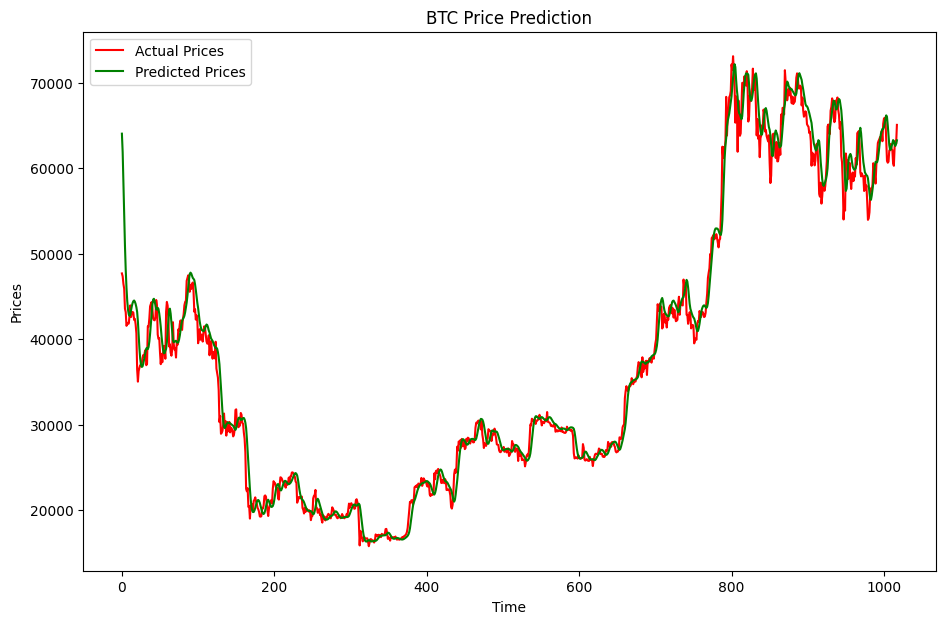

In [55]:
plt.figure(figsize=(11,7))
plt.plot(actual_prices, color='red', label='Actual Prices')
plt.plot(prediction_prices, color='green', label='Predicted Prices')
plt.title(f'{crypto_currency} Price Prediction')
plt.xlabel('Time')
plt.ylabel('Prices')
plt.legend(loc='best')
plt.show()

### Model Performance matrix

In [56]:
mae = mean_absolute_error(actual_prices, prediction_prices)
rmse = np.sqrt(mean_squared_error(actual_prices, prediction_prices))
r2 = r2_score(actual_prices, prediction_prices)

print("Mean Absolute Error : ", mae)
print("Root Mean Square Error : ", rmse)
print("R2 Score : ", r2)

Mean Absolute Error :  1309.0140392850565
Root Mean Square Error :  1995.1988943132076
R2 Score :  0.9854235553847781


### BACKTESTING

In [57]:
def backtest(model, data, window_size=300, prediction_days=60):
    results = []

    for i in range(0, len(data) - window_size - prediction_days, window_size):
        x_test = []
        window_data = data[i : i + window_size + prediction_days]

        for j in range(prediction_days, len(window_data)):
            x_test.append(window_data[j - prediction_days : j, 0])

        # x_test = np.array(x_test)
        # x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
        x_test = np.array(x_test).reshape(-1, prediction_days, 1)

        # Predict prices for this window
        # predicted_prices = model.predict(x_test)
        # predicted_prices = scaler.inverse_transform(predicted_prices)
        
        predicted_prices = model.predict(x_test)
        predictions_placeholder = np.zeros((len(predicted_prices), data.shape[1]))
        predictions_placeholder[:, 0] = predicted_prices.flatten()
        predicted_prices_original = scaler.inverse_transform(predictions_placeholder)[:, 0]

        # # Actual prices for this window
        # actual_prices = scaler.inverse_transform(window_data[prediction_days:])
        
        # Actual prices
        actual_prices_original = scaler.inverse_transform(window_data[prediction_days:])[:, 0]

        # Calculate metrics
        mae = mean_absolute_error(actual_prices_original, predicted_prices_original)
        rmse = np.sqrt(mean_squared_error(actual_prices_original, predicted_prices_original))
        r2 = r2_score(actual_prices_original, predicted_prices_original)

        # Store results for this window
        results.append({
            "Window Start": i,
            "MAE": mae,
            "RMSE": rmse,
            "R²": r2
        })

    # Convert results to a DataFrame for analysis
    return pd.DataFrame(results)

In [58]:
data = scaler.fit_transform(df['Close'].values.reshape(-1, 1))
backtest_results = backtest(model, data)

10/10 [==============================] - 0s 16ms/step


In [59]:
# Display backtest results
print(backtest_results)


    Window Start          MAE         RMSE        R²
0              0    61.929003    63.674859 -0.148285
1            300    64.105451    67.371619  0.590059
2            600   128.840853   175.816960  0.957432
3            900   679.861092  1007.046909  0.919774
4           1200   217.057083   306.174939  0.955088
5           1500   406.398991   567.874204  0.890239
6           1800   386.300358   564.727164  0.956617
7           2100  2236.492803  2909.269085  0.932534
8           2400  2003.584813  2564.311286  0.956724
9           2700   817.017704  1102.281434  0.925424
10          3000  1126.888800  1480.520288  0.980080


In [60]:
print("Average Mean Absolute Error : ", backtest_results['MAE'].mean())
print("Average Root Mean Square Error : ", backtest_results['RMSE'].mean())
print("Average R2 Score : ", backtest_results['R²'].mean())

Average Mean Absolute Error :  738.9524500474018
Average Root Mean Square Error :  982.6426133782675
Average R2 Score :  0.8105169032697792


### Equity Curve

In [61]:
def generate_signals(actual_prices, predicted_prices):
    """
    Generate trading signals based on actual vs predicted prices.
    Buy if the predicted price > actual price, otherwise sell.
    """
    signals = np.where(predicted_prices.flatten() > actual_prices, 1, -1)  # 1: Buy, -1: Sell
    return signals

def calculate_daily_returns(signals, actual_prices):
    """
    Calculate daily returns based on trading signals.
    """
    returns = np.diff(actual_prices) / actual_prices[:-1]  # Calculate daily returns
    strategy_returns = returns * signals[:-1]  # Apply signals to returns
    return strategy_returns

def plot_equity_curve(strategy_returns):
    cumulative_returns = np.cumsum(strategy_returns)

    fig = go.Figure()
    fig.add_trace(go.Scatter(y=cumulative_returns, mode='lines', name='Equity Curve'))
    fig.update_layout(
        title='Equity Curve of Trading Strategy',
        xaxis_title='Days',
        yaxis_title='Cumulative Returns'
    )
    fig.show()

# Generate signals and calculate returns
signals = generate_signals(actual_prices, prediction_prices)
strategy_returns = calculate_daily_returns(signals, actual_prices)

# Plot the equity curve
plot_equity_curve(strategy_returns)

### MAXIMUM DRAWDOWN

0.8339900882218974
Maximum Drawdown: 83.40%


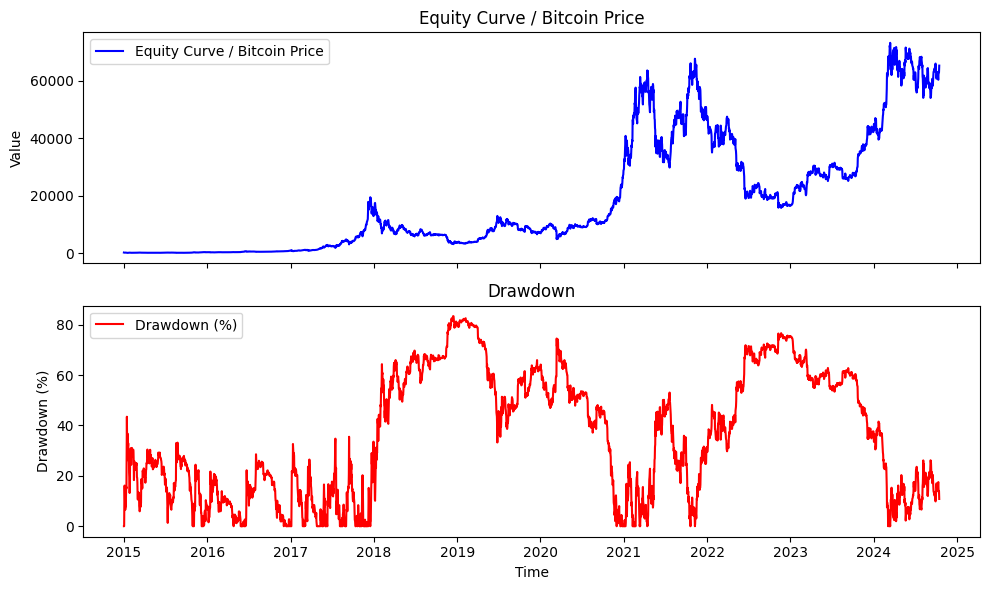

In [62]:
df['Peak Value'] = df['Close'].cummax()

# Calculate drawdown at each point (as a percentage)
df['Drawdown'] = (df['Peak Value'] - df['Close']) / df['Peak Value']

# Find the maximum drawdown
max_drawdown = df['Drawdown'].max()

print(max_drawdown)

print(f'Maximum Drawdown: {max_drawdown * 100:.2f}%')

# Plotting the equity curve (or Bitcoin price) and the drawdown
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)

# Plot equity curve or Bitcoin prices
ax1.plot(df['Close'], label='Equity Curve / Bitcoin Price', color='blue')
ax1.set_title('Equity Curve / Bitcoin Price')
ax1.set_ylabel('Value')
ax1.legend(loc='upper left')

# Plot drawdown curve
ax2.plot(df['Drawdown'] * 100, label='Drawdown (%)', color='red')
ax2.set_title('Drawdown')
ax2.set_xlabel('Time')
ax2.set_ylabel('Drawdown (%)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

### Return on Investment

In [63]:
initial_value = df['Close'].iloc[0]  # First closing price in the period
final_value = df['Close'].iloc[-1]   # Last closing price in the period

# Calculate ROI
roi = ((final_value - initial_value) / initial_value) * 100

# Display Results
print(f"Initial Value: ${initial_value:.2f}")
print(f"Final Value: ${final_value:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

Initial Value: $314.25
Final Value: $65174.84
Return on Investment (ROI): 20639.87%


### Predict Next Day

In [64]:
# real_data = [model_inputs[len(model_inputs) + 1 - prediction_days : len(model_inputs) + 1 , 0]]
# real_data = np.array(real_data)
# real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

real_data = model_inputs[-prediction_days:].reshape(1, prediction_days, 1)
prediction = model.predict(real_data)

1/1 [==============================] - 0s 33ms/step


In [65]:
# prediction = model.predict(real_data)
# prediction = scaler.inverse_transform(prediction)
# print(prediction)

placeholder = np.zeros((1, model_inputs.shape[1]))  # Shape: (1, 1)
placeholder[0, 0] = prediction  # Insert predicted 'Close' price

prediction = scaler.inverse_transform(placeholder)[0, 0]


C:\Users\Vaishali Premani\AppData\Local\Temp\ipykernel_24316\1640315895.py:6: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)



In [67]:
print(f"Predicted Bitcoin Price for Next Day: ${prediction:.2f}")

Predicted Bitcoin Price for Next Day: $61534.37
